In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
train_data = pd.read_csv('/content/mnist_train.csv')
test_data = pd.read_csv('/content/mnist_test.csv')

train_data = np.array(train_data)
test_data = np.array(test_data)

In [33]:
X_train = train_data[:, 1:].T
Y_train = train_data[:, 0].T
X_train = X_train / 255.


X_test = test_data[:, 1:].T
Y_test = test_data[:, 0].T
X_test = X_test / 255.

In [34]:
m_train, n_train = train_data.shape
m_test, n_test = test_data.shape
m = m_train + m_test
n = n_train + n_test

In [35]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype("int")

In [36]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [37]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [38]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 7 ... 7 6 1] [5 0 4 ... 5 6 8]
0.1078
Iteration:  10
[0 0 0 ... 0 7 1] [5 0 4 ... 5 6 8]
0.18906666666666666
Iteration:  20
[0 0 0 ... 0 6 1] [5 0 4 ... 5 6 8]
0.31708333333333333
Iteration:  30
[0 0 0 ... 0 6 1] [5 0 4 ... 5 6 8]
0.38643333333333335
Iteration:  40
[0 0 0 ... 0 6 1] [5 0 4 ... 5 6 8]
0.42685
Iteration:  50
[0 0 0 ... 0 6 1] [5 0 4 ... 5 6 8]
0.46565
Iteration:  60
[0 0 7 ... 0 6 1] [5 0 4 ... 5 6 8]
0.50745
Iteration:  70
[0 0 7 ... 0 6 1] [5 0 4 ... 5 6 8]
0.54225
Iteration:  80
[0 0 7 ... 0 6 1] [5 0 4 ... 5 6 8]
0.5708666666666666
Iteration:  90
[0 0 7 ... 0 6 1] [5 0 4 ... 5 6 8]
0.59595
Iteration:  100
[0 0 7 ... 0 6 1] [5 0 4 ... 5 6 8]
0.61815
Iteration:  110
[0 0 7 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6379166666666667
Iteration:  120
[3 0 7 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6569666666666667
Iteration:  130
[3 0 9 ... 0 6 8] [5 0 4 ... 5 6 8]
0.6728666666666666
Iteration:  140
[3 0 9 ... 5 6 8] [5 0 4 ... 5 6 8]
0.6871166666666667
Iteration:  150
[3 0 

In [39]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


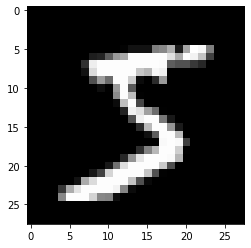

Prediction:  [0]
Label:  0


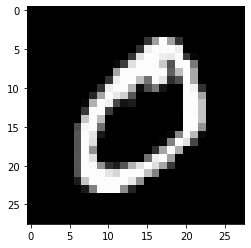

Prediction:  [4]
Label:  4


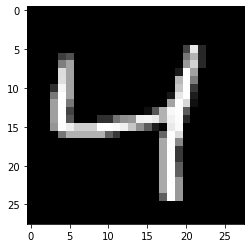

Prediction:  [1]
Label:  1


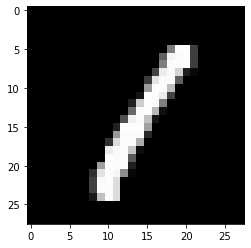

In [40]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [41]:
predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(predictions, Y_test)

[7 3 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.8383